# 5. [Visualisations](https://scikit-learn.org/stable/visualizations.html)

Scikit-learn définit une API simple pour créer des visualisations pour l'apprentissage automatique. La principale caractéristique de cette API est de permettre un traçage rapide et des ajustements visuels sans recalcul. Nous fournissons des classes `Display` qui exposent deux méthodes de création de tracés : `from_estimator` et `from_predictions`. La méthode `from_estimator` prendra un estimateur ajusté et quelques données (`X` et `y`) et créera un objet `Display`. Parfois, nous aimerions ne calculer les prédictions qu'une seule fois et nous devrions utiliser `from_predictions` à la place. Dans l'exemple suivant, nous traçons une courbe ROC pour une machine à vecteurs de support ajustée :

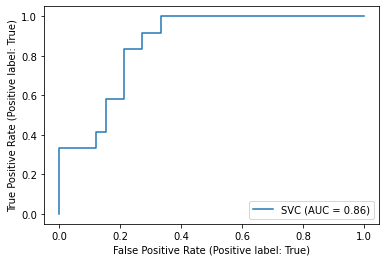

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import RocCurveDisplay
from sklearn.datasets import load_wine

X, y = load_wine(return_X_y=True)
y = y == 2  # make binary
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
svc = SVC(random_state=42)
svc.fit(X_train, y_train)

svc_disp = RocCurveDisplay.from_estimator(svc, X_test, y_test)

L'objet `svc_disp` renvoyé nous permet de continuer à utiliser la courbe ROC déjà calculée pour SVC dans les tracés futurs. Dans ce cas, le `svc_disp` est un [`RocCurveDisplay`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.RocCurveDisplay.html#sklearn.metrics.RocCurveDisplay) qui stocke les valeurs calculées sous forme d'attributs appelés `roc_auc`, `fpr` et `tpr`. Sachez que nous pourrions obtenir les prédictions de la machine à vecteurs de support, puis utiliser `from_predictions` au lieu de `from_estimator`. Ensuite, nous entraînons un classifieur de forêt aléatoire et retraçons la courbe roc précédemment calculée en utilisant la méthode `plot` de l'objet `Display`.

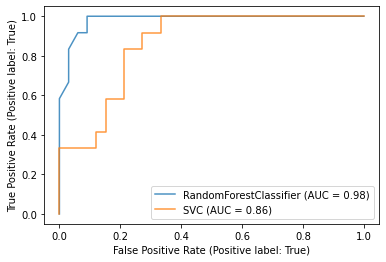

In [2]:
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=10, random_state=42)
rfc.fit(X_train, y_train)

ax = plt.gca()
rfc_disp = RocCurveDisplay.from_estimator(rfc, X_test, y_test, ax=ax, alpha=0.8)
svc_disp.plot(ax=ax, alpha=0.8)

Notez que nous passons `alpha=0,8` aux fonctions de tracé pour ajuster les valeurs alpha des courbes.

## Exemple - [Tracé avancé avec dépendance partielle](https://scikit-learn.org/stable/auto_examples/miscellaneous/plot_partial_dependence_visualization_api.html#sphx-glr-auto-examples-miscellaneous-plot-partial-dependence-visualization-api-py)

La fonction [`plot_partial_dependence`](https://scikit-learn.org/stable/modules/generated/sklearn.inspection.plot_partial_dependence.html#sklearn.inspection.plot_partial_dependence) renvoie un objet [`PartialDependenceDisplay`](https://scikit-learn.org/stable/modules/generated/sklearn.inspection.PartialDependenceDisplay.html#sklearn.inspection.PartialDependenceDisplay) qui peut être utilisé pour tracer sans avoir à recalculer la dépendance partielle. Dans cet exemple, nous montrons comment tracer des graphiques de dépendance partielle et comment personnaliser rapidement le graphique avec l'API de visualisation.

**NB** Voir aussi [Exemple - Courbe ROC avec API de visualisation](https://scikit-learn.org/stable/auto_examples/miscellaneous/plot_roc_curve_visualization_api.html#sphx-glr-auto-examples-miscellaneous-plot-roc-curve-visualization-api-py)

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.inspection import PartialDependenceDisplay

### Entraîner des modèles sur l'ensemble de données sur le diabète

Tout d'abord, nous entraînons un arbre de décision et un perceptron multicouche sur l'ensemble de données sur le diabète.

In [5]:
diabetes = load_diabetes()
X = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
y = diabetes.target

tree = DecisionTreeRegressor()
mlp = make_pipeline(
    StandardScaler(),
    MLPRegressor(hidden_layer_sizes=(100, 100), tol=1e-2, max_iter=500, random_state=0),
)
tree.fit(X, y)
mlp.fit(X, y)

c:\Users\franc\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('mlpregressor',
                 MLPRegressor(hidden_layer_sizes=(100, 100), max_iter=500,
                              random_state=0, tol=0.01))])

### Tracé de la dépendance partielle pour deux caractéristiques

Nous traçons des courbes de dépendance partielle pour les caractéristiques « âge » et « bmi » (indice de masse corporelle) pour l'arbre de décision. Avec deux caractéristiques, [`from_estimator`](https://scikit-learn.org/stable/modules/generated/sklearn.inspection.PartialDependenceDisplay.html#sklearn.inspection.PartialDependenceDisplay.from_estimator) s'attend à tracer deux courbes. Ici, la fonction plot place une grille de deux plots en utilisant l'espace défini par `ax`.

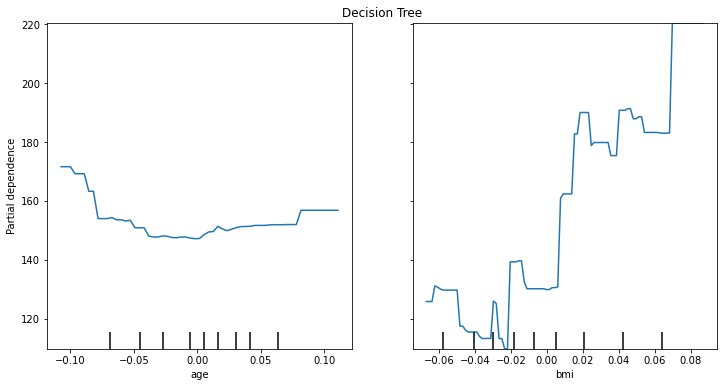

In [6]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.set_title("Decision Tree")
tree_disp = PartialDependenceDisplay.from_estimator(tree, X, ["age", "bmi"], ax=ax)

Les courbes de dépendance partielle peuvent être tracées pour le perceptron multicouche. Dans ce cas, `line_kw` est passé à [`from_estimator`](https://scikit-learn.org/stable/modules/generated/sklearn.inspection.PartialDependenceDisplay.html#sklearn.inspection.PartialDependenceDisplay.from_estimator) pour changer la couleur de la courbe.

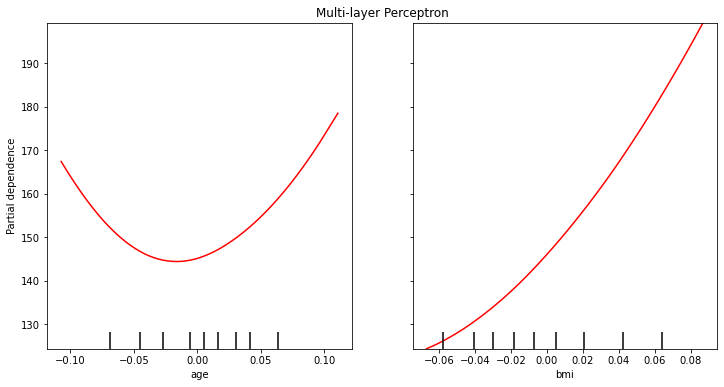

In [7]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.set_title("Multi-layer Perceptron")
mlp_disp = PartialDependenceDisplay.from_estimator(
    mlp, X, ["age", "bmi"], ax=ax, line_kw={"color": "red"}
)

### Tracé de la dépendance partielle des deux modèles ensemble

Les objets `tree_disp` et `mlp_disp` [`PartialDependenceDisplay`](https://scikit-learn.org/stable/modules/generated/sklearn.inspection.PartialDependenceDisplay.html#sklearn.inspection.PartialDependenceDisplay) contiennent toutes les informations calculées nécessaires pour recréer les courbes de dépendance partielle. Cela signifie que nous pouvons facilement créer des tracés supplémentaires sans avoir à recalculer les courbes.

Une façon de tracer les courbes consiste à les placer dans la même figure, avec les courbes de chaque modèle sur chaque ligne. Tout d'abord, nous créons une figure avec deux axes dans deux lignes et une colonne. Les deux axes sont transmis aux fonctions [`plot`](https://scikit-learn.org/stable/modules/generated/sklearn.inspection.PartialDependenceDisplay.html#sklearn.inspection.PartialDependenceDisplay.plot) de `tree_disp` et `mlp_disp`. Les axes donnés seront utilisés par la fonction de traçage pour dessiner la dépendance partielle. Le tracé résultant place les courbes de dépendance partielle de l'arbre de décision dans la première rangée du perceptron multicouche dans la deuxième rangée.

Text(0.5, 1.0, 'Multi-layer Perceptron')

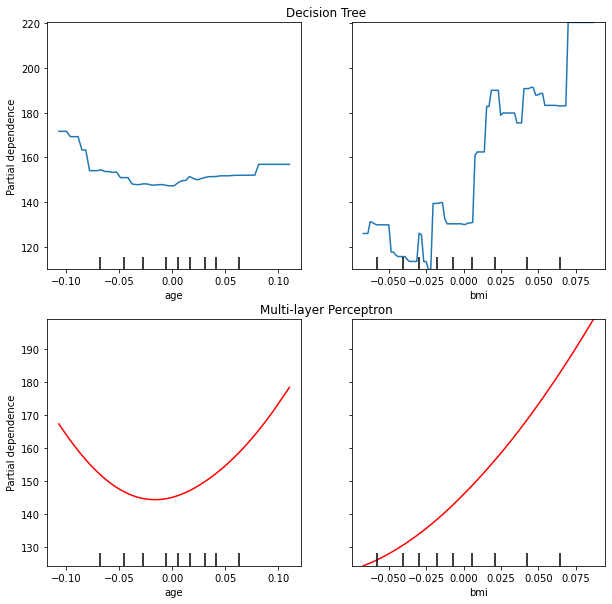

In [8]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 10))
tree_disp.plot(ax=ax1)
ax1.set_title("Decision Tree")
mlp_disp.plot(ax=ax2, line_kw={"color": "red"})
ax2.set_title("Multi-layer Perceptron")

Une autre façon de comparer les courbes consiste à les tracer les unes au-dessus des autres. Ici, nous créons une figure avec une ligne et deux colonnes. Les axes sont passés dans la fonction [`plot`](https://scikit-learn.org/stable/modules/generated/sklearn.inspection.PartialDependenceDisplay.html#sklearn.inspection.PartialDependenceDisplay.plot) sous forme de liste, qui tracera les courbes de dépendance partielle de chaque modèle sur les mêmes axes. La longueur de la liste des axes doit être égale au nombre de plots dessinés

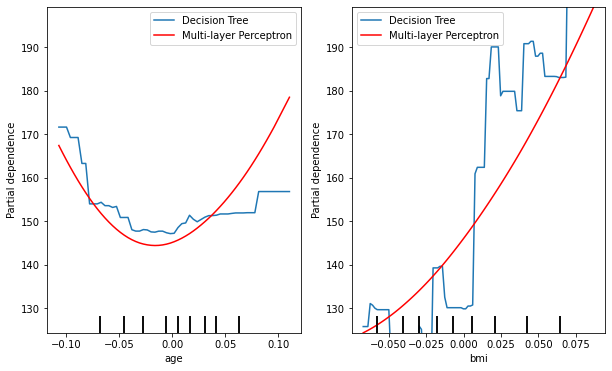

In [9]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 6))
tree_disp.plot(ax=[ax1, ax2], line_kw={"label": "Decision Tree"})
mlp_disp.plot(
    ax=[ax1, ax2], line_kw={"label": "Multi-layer Perceptron", "color": "red"}
)
ax1.legend()
ax2.legend()

`tree_disp.axes_` est un conteneur de tableau numpy des axes utilisés pour dessiner les tracés de dépendance partielle. Cela peut être passé à `mlp_disp` pour avoir le même effet de dessiner les tracés les uns sur les autres. De plus, `mlp_disp.figure_` stocke la figure, ce qui permet de redimensionner la figure après avoir appelé `plot`. Dans ce cas, `tree_disp.axes_` a deux dimensions, donc `plot` n'affichera que l'étiquette y et les graduations y sur le tracé le plus à gauche.

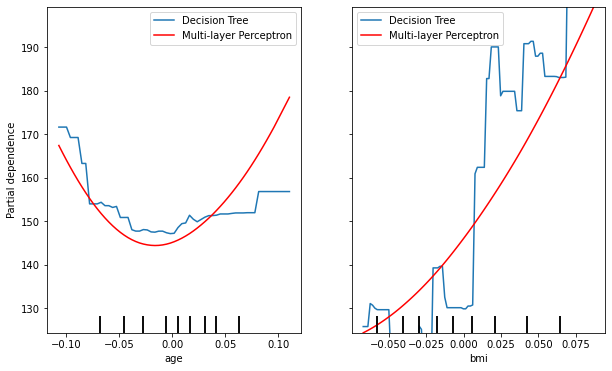

In [10]:
tree_disp.plot(line_kw={"label": "Decision Tree"})
mlp_disp.plot(
    line_kw={"label": "Multi-layer Perceptron", "color": "red"}, ax=tree_disp.axes_
)
tree_disp.figure_.set_size_inches(10, 6)
tree_disp.axes_[0, 0].legend()
tree_disp.axes_[0, 1].legend()
plt.show()

### Tracé de la dépendance partielle pour une caractéristique

Ici, nous traçons les courbes de dépendance partielle pour une seule caractéristique, « l'âge », sur les mêmes axes. Dans ce cas, `tree_disp.axes_` est passé dans la deuxième fonction plot.

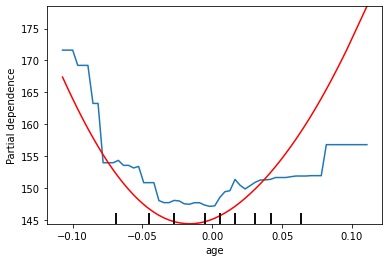

In [11]:
tree_disp = PartialDependenceDisplay.from_estimator(tree, X, ["age"])
mlp_disp = PartialDependenceDisplay.from_estimator(
    mlp, X, ["age"], ax=tree_disp.axes_, line_kw={"color": "red"}
)